# Introduction

# About the data

Column | Description
-----------|-------------------
ID | Unique ID.
Gender | Gender of the customer
Ever_Married | Marital status of the customer.
Age | Age of the customer.
Graduated | Is the customer a graduate ?
Profession | Profession of the customer.
Work_Experience | Work Experience in years.
Spending_Score | Spending score of the customer.
Family_Size | Number of family members for the customer (including the customer).
Var_1 | Anonymised Category for the customer.
Segmentation | Customer Segment of the customer (Target for Classification).


# Business question and evaluation

# Importing and exploring data

In [25]:
# Importing

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [26]:
# Loading data

data = pd.read_csv('data/Train.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [27]:
# Shape

data.shape

(8068, 11)

> 8068 instances and 11 features. Its a reasonable sized dataset.

In [28]:
# Check for duplicates

data.duplicated().sum()

0

We won't need the `ID` anymore. Furthermore, since we're clustering, we can also drop `Var_1` and `Segmentation`.

In [29]:
# Drop columns we won't use

df = data.drop(['ID', 'Var_1', 'Segmentation'], axis=1)
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,No,22,No,Healthcare,1.0,Low,4.0
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 504.4+ KB


In [32]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
dtype: int64

In [24]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


Since our objective is to characterize our clients, it's wise to don't bring any assumptions and impute the missing values. Instead, I'll only use complete data.

In [37]:
df_dropna = df.dropna()
df_dropna.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

# EDA

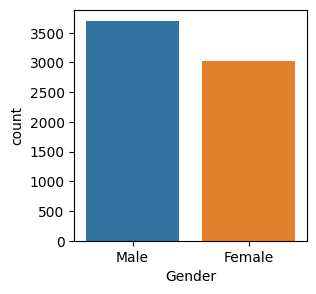

In [46]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Gender');

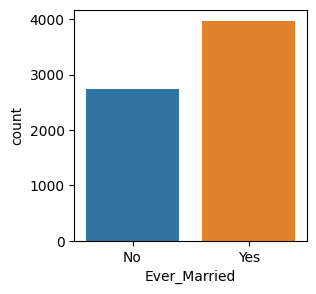

In [47]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Ever_Married');

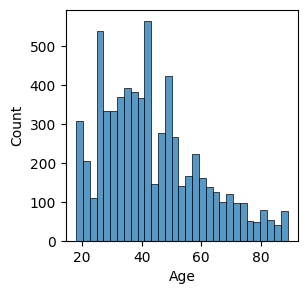

In [48]:
plt.figure(figsize=(3,3))
sns.histplot(df_dropna, x='Age');

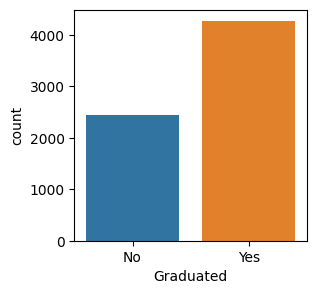

In [49]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Graduated');

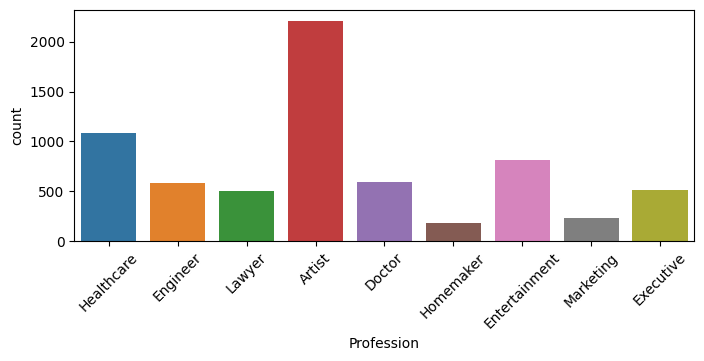

In [57]:
plt.figure(figsize=(8,3))
chart = sns.countplot(df_dropna, x='Profession')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

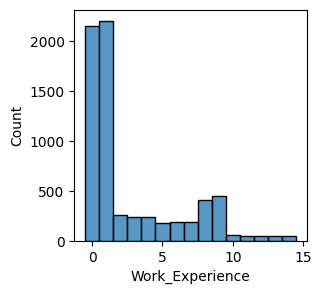

In [59]:
plt.figure(figsize=(3,3))
sns.histplot(df_dropna, x='Work_Experience', discrete=True);

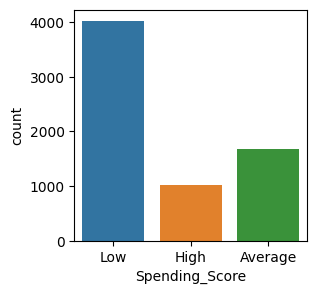

In [62]:
plt.figure(figsize=(3,3))
sns.countplot(df_dropna, x='Spending_Score');

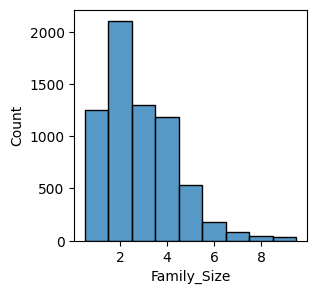

In [63]:
plt.figure(figsize=(3,3))
sns.histplot(df_dropna, x='Family_Size', discrete=True);